In [35]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tools import * 

In [4]:
# Importing pre-processed data
df = pd.read_csv('data/pre_proc_data.csv',index_col=0)
# Reducing the data size for speed training. 
df_train_samp = df.sample(frac=0.2, random_state=101)
print ("Number of samples in full dataset = " + str(len(df)))
print ("Number of samples in sample dataset for faster training = " + str(len(df_train_samp)))

Number of samples in full dataset = 395219
Number of samples in sample dataset for faster training = 79044


In [167]:
# Splitting out features and label 
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values
X_full = df.drop('loan_repaid',axis=1).values
y_full = df['loan_repaid'].values

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
# Getting training/testing data from the reduced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [170]:
# Scaling the data 
from sklearn.preprocessing import MinMaxScaler

In [171]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [172]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [173]:
# Base level test without anything extra
model = Sequential()

# Hidden layers
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.5))

# Output layer 
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [174]:
model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/100
2471/2471 [==============================] - 4s 2ms/step - loss: 0.3864 - accuracy: 0.8057 - val_loss: 0.3354 - val_accuracy: 0.8851
Epoch 2/100
2471/2471 [==============================] - 4s 1ms/step - loss: 0.3441 - accuracy: 0.8797 - val_loss: 0.3476 - val_accuracy: 0.8823
Epoch 3/100
2471/2471 [==============================] - 4s 1ms/step - loss: 0.3383 - accuracy: 0.8764 - val_loss: 0.3357 - val_accuracy: 0.8837
Epoch 4/100
2471/2471 [==============================] - 4s 2ms/step - loss: 0.3364 - accuracy: 0.8753 - val_loss: 0.3556 - val_accuracy: 0.8694
Epoch 5/100
2471/2471 [==============================] - 4s 2ms/step - loss: 0.3353 - accuracy: 0.8746 - val_loss: 0.3506 - val_accuracy: 0.8777
Epoch 6/100
2471/2471 [==============================] - 4s 2ms/step - loss: 0.3337 - accuracy: 0.8758 - val_loss: 0.3441 - val_accuracy: 0.8760
Epoch 7/100
2471/2471 [==============================] - 4s 2ms/step - loss: 0.3318 - accuracy: 0.8751 - val_loss: 0.3541 - val_ac

In [175]:
model_hist = pd.DataFrame(model.history.history)

In [176]:
model_hist["model"] = "baseline"

<AxesSubplot:>

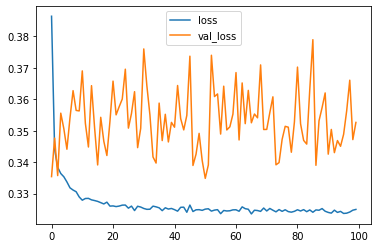

In [177]:
model_hist[['loss','val_loss']].plot()

In [178]:
# Testing weight norms and dropout
model_DrMN = Sequential()

# # Hidden layers
model_DrMN.add(Dense(78,activation='relu',kernel_constraint=max_norm(5),bias_constraint=max_norm(3)))
model_DrMN.add(Dropout(0.5))
model_DrMN.add(Dense(36,activation='relu',kernel_constraint=max_norm(5),bias_constraint=max_norm(3)))
model_DrMN.add(Dropout(0.5))
model_DrMN.add(Dense(18,activation='relu',kernel_constraint=max_norm(5),bias_constraint=max_norm(3)))
model_DrMN.add(Dropout(0.5))
model_DrMN.add(Dense(9,activation='relu',kernel_constraint=max_norm(5),bias_constraint=max_norm(3)))
model_DrMN.add(Dropout(0.5))

# # Output layer 
model_DrMN.add(Dense(1,activation='sigmoid'))
# model.compile()
model_DrMN.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# Adding in an early stopping criteria
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=2,patience=10,restore_best_weights=True)

In [179]:
model_DrMN.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_test,y_test),batch_size=64,callbacks=early_stop)

Epoch 1/100
4941/4941 [==============================] - 9s 2ms/step - loss: 0.3262 - accuracy: 0.8620 - val_loss: 0.2679 - val_accuracy: 0.8869
Epoch 2/100
4941/4941 [==============================] - 10s 2ms/step - loss: 0.2805 - accuracy: 0.8826 - val_loss: 0.2644 - val_accuracy: 0.8869
Epoch 3/100
4941/4941 [==============================] - 9s 2ms/step - loss: 0.2791 - accuracy: 0.8822 - val_loss: 0.2650 - val_accuracy: 0.8869
Epoch 4/100
4941/4941 [==============================] - 9s 2ms/step - loss: 0.2785 - accuracy: 0.8825 - val_loss: 0.2642 - val_accuracy: 0.8869
Epoch 5/100
4941/4941 [==============================] - 9s 2ms/step - loss: 0.2784 - accuracy: 0.8821 - val_loss: 0.2638 - val_accuracy: 0.8869
Epoch 6/100
4941/4941 [==============================] - 10s 2ms/step - loss: 0.2781 - accuracy: 0.8825 - val_loss: 0.2658 - val_accuracy: 0.8869
Epoch 7/100
4941/4941 [==============================] - 9s 2ms/step - loss: 0.2775 - accuracy: 0.8823 - val_loss: 0.2635 - val_

In [180]:
# adding history to combined dataframe for comparison
model_hist = store_hist(model_hist,pd.DataFrame(model_DrMN.history.history),'Dr_MN')

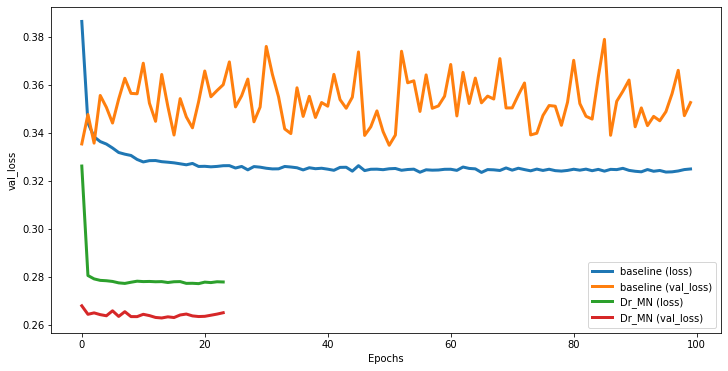

In [181]:
plot_perf(model_hist,models=[],metrics=['loss','val_loss'])

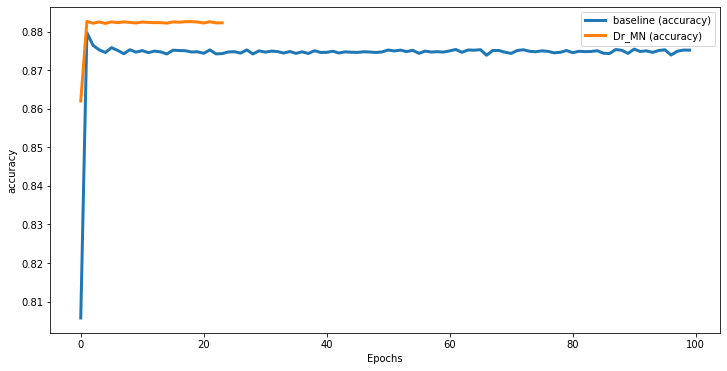

In [182]:
plot_perf(model_hist,models=[],metrics=['accuracy'])

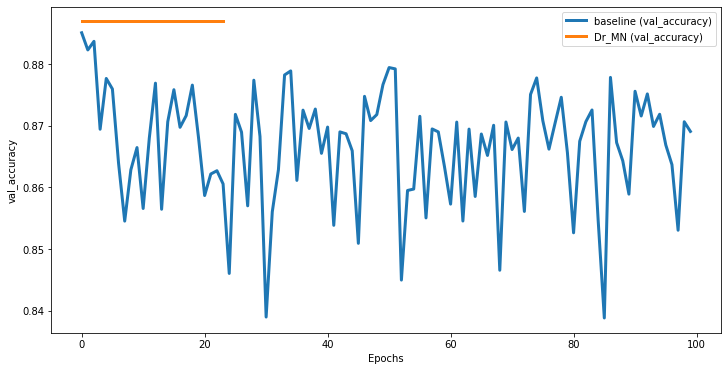

In [183]:
plot_perf(model_hist,models=[],metrics=['val_accuracy'])

In [184]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, balanced_accuracy_score

In [185]:
y_pred = model_DrMN.predict_classes(X_test) 

In [186]:
# Saving the NN model to be compared with other methods later
!mkdir -p SavedModels
model_DrMN.save('SavedModels/NNModel')

INFO:tensorflow:Assets written to: SavedModels/NNModel/assets


In [302]:
CR = {"NN":classification_report(y_test,y_pred)}
print ("NN Classification Report: \n"+ NN_CR)

CM = {"NN":confusion_matrix(y_test,y_pred)}
print ("NN Confusion Matrix: \n" + str(NN_CM))

prec = {"NN":precision_score(y_test,y_pred)}
print ("NN Precision: \n" +str(NN_prec))

rec = {"NN":recall_score(y_test,y_pred)}
print ("NN Recall: \n" +str(NN_rec))

f1 = {'NN':f1_score(y_test,y_pred)}
print ("NN f1: \n" +str(NN_f1))

b_acc = {'NN':balanced_accuracy_score(y_test,y_pred)}
print ("NN balanced accuracy score: \n" +str(NN_b_acc))

NN Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044

NN Confusion Matrix: 
[[ 6720  8938]
 [    0 63386]]
NN Precision: 
0.8764172335600907
NN Recall: 
1.0
NN f1: 
0.9341389728096676
NN balanced accuracy score: 
0.7145867926938306


Evauluation and discussion

Its worth noting that we have an imbalanced dataset with an 80/20 split of paid back/charged off loans. Therefore, a model that always predicts that a loan would be paid back gets an accuracy score of 80% so that should be our baseline for accuracy. Using this logic 88% accuracy seems OK, it doesnt seem great. 

Our poor recall score is due to us mis-labelling alot of the 'charged off' loans, as seen by the top right hand value in the confusion matrix. 

Best results I can find on Kaggle for the dataset get this classification report and confusion matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



Confusion Matirx:
[[ 7024  8634]
 [  268 63118]]

 These results are extremely similar to my own. Differences include the sample size of their dataset compared to mine. I reduced my sample size quite significantly to improve runtimes on my machine when training. 

Future work: 
- Perhaps some more hyperparameter tuning of my NN would help with GridSearchCV (e.g. Dropout%, #of epochs)? 
- Testing on a more balanced dataset may improve recall of loans that arent repaid (currently 0.43 in my testing) which isnt great. 
- Try other ML methods to see whether they give better results (SVMs, Logistic Regression, Decision Trees)

Moving on to a Decision Tree.....

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

Use k-means cross validation to choose the most appropriate depth of the tree to allow for the best model generalisation. I.e. if you dont restrain the tree it will completely over fit to the training data and have extremely high variance. 

In [189]:
DTC = DecisionTreeClassifier()

In [190]:
# Function to run cross validation on a number of decision trees to decide the best max depth for highest generalisation. 
def calcCV(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_sc = []
    cv_sc_std = []
    cv_sc_mean = []
    accuracy = []

    for depth in tree_depths: 
        # Generate tree for each max depth
        tree_model = DecisionTreeClassifier(max_depth = depth)
        # calculate CV score for tree
        cv = cross_val_score(tree_model, X, y,scoring=scoring)
        # Saving scores
        cv_sc.append(cv)
        cv_sc_std.append(cv.std())
        cv_sc_mean.append(cv.mean())
        accuracy.append(tree_model.fit(X,y).score(X,y))
        print('tree depth '+str(depth) +" done")

    cv_sc = np.array(cv_sc)
    cv_sc_std = np.array(cv_sc_std)
    cv_sc_mean = np.array(cv_sc_mean)
    accuracy = np.array(accuracy)

    return cv_sc, cv_sc_std, cv_sc_mean, accuracy

In [191]:
depths = range(1,20)

CV , CV_std, CV_mean, acc = calcCV(X_train,y_train,depths)

tree depth 1 done
tree depth 2 done
tree depth 3 done
tree depth 4 done
tree depth 5 done
tree depth 6 done
tree depth 7 done
tree depth 8 done
tree depth 9 done
tree depth 10 done
tree depth 11 done
tree depth 12 done
tree depth 13 done
tree depth 14 done
tree depth 15 done
tree depth 16 done
tree depth 17 done
tree depth 18 done
tree depth 19 done


Text(0, 0.5, 'Accuracy')

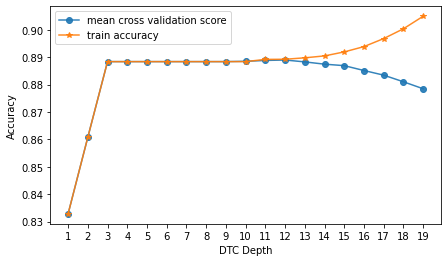

In [192]:
plt.figure(figsize=(7,4))
plt.plot(depths, CV_mean,'-o',label='mean cross validation score',alpha=0.9)
plt.plot(depths, acc, '-*', label='train accuracy', alpha=0.9)
plt.legend()
plt.xticks(depths)
plt.xlabel('DTC Depth')
plt.ylabel('Accuracy')

A decision tree depth of 12 is optimal for this data before overfitting. 

In [284]:
# Fitting optimal DTC to the training data
DTC = DecisionTreeClassifier(max_depth = 12,random_state=101)

DTC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12, random_state=101)

In [285]:
DTC.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 101,
 'splitter': 'best'}

In [286]:
y_predDTC = DTC.predict(X_test)

In [303]:
CR["DTC"] = classification_report(y_test,y_predDTC)
print ("DTC Classification Report: \n"+ DTC_CR)

CM["DTC"] = confusion_matrix(y_test,y_predDTC)
print ("DTC Confusion Matrix: \n" + str(DTC_CM))

prec["DTC"] = precision_score(y_test,y_predDTC)
print ("DTC Precision: \n" +str(DTC_prec))

rec["DTC"] = recall_score(y_test,y_predDTC)
print ("DTC Recall: \n" +str(DTC_rec))

f1["DTC"] = f1_score(y_test,y_predDTC)
print ("DTC f1: \n" +str(DTC_f1))

b_acc["DTC"] = balanced_accuracy_score(y_test,y_predDTC)
print ("DTC balanced accuracy score: \n" +str(DTC_b_acc))

DTC Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

DTC Confusion Matrix: 
[[ 7057  8601]
 [  300 63086]]
DTC Precision: 
0.8800200873240616
DTC Recall: 
0.9952670936799924
DTC f1: 
0.9341023002376492
DTC balanced accuracy score: 
0.722981611726955


In [290]:
score_f1 = {'ANN':NN_f1,'DTC':DTC_f1}

Trying a random forest approach......

In [291]:
from sklearn.ensemble import RandomForestClassifier

In [292]:
RFC = RandomForestClassifier(n_estimators=100,max_depth=9,verbose=1)

In [293]:
RFC.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomForestClassifier(max_depth=9, verbose=1)

In [294]:
y_predRFC = RFC.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


In [295]:
# Converting feature importances to a dataframe to view 
feats = list(df.columns.values)
feat_imp = list(RFC.feature_importances_)
feature_importances = {}
for key in feats:
    for value in feat_imp:
        feature_importances[key] = value
        feat_imp.remove(value)
        break  

feature_importances = pd.DataFrame(feature_importances,index=[0])

In [296]:
# Extracing the top 5 mmost important features from the dataframe to view. 
feature_importances.transpose().sort_values(by=0,ascending=False).head(5)

# 4/5 top features are the zip-codes where the people live. This makes sense as its probably more likely that a person in a more afluent area would pay back their loans in comparison to a person in a less afluent area

,0
86630,0.225491
70466,0.219210
05113,0.217551
int_rate,0.067002
purpose_wedding,0.059546


In [304]:
CR["RFC"] = classification_report(y_test,y_predRFC)
print ("DTC Classification Report: \n"+ RFC_CR)

CM["RFC"] = confusion_matrix(y_test,y_predRFC)
print ("DTC Confusion Matrix: \n" + str(RFC_CM))

prec["RFC"] = precision_score(y_test,y_predRFC)
print ("DTC Precision: \n" +str(RFC_prec))

rec["RFC"] = recall_score(y_test,y_predRFC)
print ("DTC Recall: \n" +str(RFC_rec))

f1["RFC"] = f1_score(y_test,y_predRFC)
print ("DTC f1: \n" +str(RFC_f1))

b_acc["RFC"] = balanced_accuracy_score(y_test,y_predRFC)
print ("DTC balanced accuracy score: \n" +str(RFC_b_acc))

DTC Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044

DTC Confusion Matrix: 
[[ 6720  8938]
 [    0 63386]]
DTC Precision: 
0.8764172335600907
DTC Recall: 
1.0
DTC f1: 
0.9341389728096676
DTC balanced accuracy score: 
0.7145867926938306


In [308]:
b_acc

{'NN': 0.7145867926938306, 'DTC': 0.722981611726955, 'RFC': 0.7145867926938306}

Trying an SVM approach.....

In [310]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [313]:
SVCmodel = SVC()

In [314]:
# Using grid search to find the optimal gamma, C and kernel values to be used in the SVC. 
# Splitting out a sub-set of the data to train this on to reduce training time
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVCmodel,param_grid,refit=True,verbose=2)

In [312]:
grid.fit(X_train,y_train)

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.